In [109]:
# 1. Seleccionar 2 imagenes que requieran una mejora de contraste
# 2. Aplica 2 tecnicas que permitan mejorar el contraste
# una con dev propio y otra con OpenCV
# 3. Aplica las dos tecnicas a las 2 imagenes
# 4. Describe como seleccionaste la mejor tecnica para el ajuste de intensidad
# 5. Describe caracteristicas de las tecnicas seleccionadas
# 6. Compara y concluye

In [110]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [111]:
def plot_rgb_histogramTodo(image):
    # Dividir la imagen en canales RGB
    b, g, r = cv2.split(image)

    # Calcular histograma de cada canal
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    plt.plot(hist_b, color='blue', label='Azul')
    plt.plot(hist_g, color='green', label='Verde')
    plt.plot(hist_r, color='red', label='Rojo')
    plt.title('Histogramas')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

In [112]:
def imshow(title="Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize = (size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [113]:
img01 = cv2.imread("r1.png", cv2.IMREAD_GRAYSCALE)
img02 = cv2.imread("p2.jpg", 1)

In [114]:
img01

array([[  0,   0,   0, ...,  39, 255, 255],
       [  0,   0,   0, ...,  39, 255, 255],
       [  0,   0,   0, ...,  37, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [162]:
def invert_color():
    h, w = img01.shape

    imgInvert = np.zeros((h, w), np.uint8)

    for j in range(h):
        for i in range(w):
            newValue = 0
            valor_actual = img01[j, i]
            #
            
            if (valor_actual > 200):
                newValue = int((255 - img01[j, i]) - 100)
                            
            if (valor_actual < 30):
                newValue = int((255 - img01[j, i]) + 50)
            else:
                newValue = int((255 - img01[j, i]))



            imgInvert[j, i] = np.clip(newValue, 0, 255)

    imshow("IMG INVERT", imgInvert)

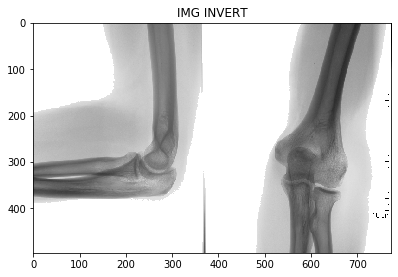

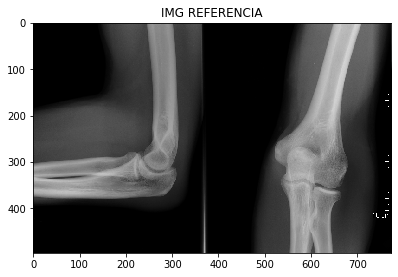

In [163]:
invert_color()
imshow("IMG REFERENCIA", img01)

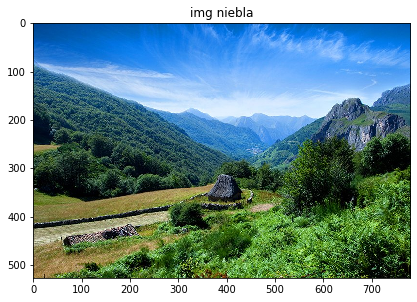

In [117]:
imshow("img niebla", img02)

In [118]:
def mejora_contraste():
    # Definir constantes a sumar a cada canal
    c_azul = 0
    c_verde = 10
    c_rojo = 0
    
    cv2.split(img02)
    
    canal_azul, canal_verde, canal_rojo = cv2.split(img02)
    
    print(canal_azul)
    
    c_azul_const = np.clip(canal_azul.astype(int) + c_azul, 0, 255).astype(np.uint8)
    c_verde_const = np.clip(canal_verde.astype(int) + c_verde, 0, 255).astype(np.uint8)
    c_rojo_const = np.clip(canal_rojo.astype(int) + c_rojo, 0, 255).astype(np.uint8)
    
    imagen_final = cv2.merge((c_azul_const, c_verde_const, c_rojo_const))
    
    plt.imshow(cv2.cvtColor(imagen_final, cv2.COLOR_BGR2RGB))
    plt.title('imagen')
    plt.show()
    

    

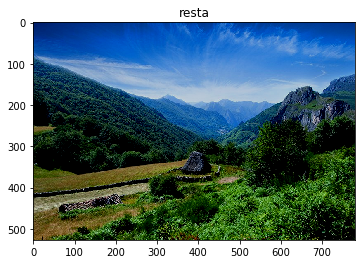

In [119]:
def restar_intensidad():
    M = np.ones(img02.shape, dtype = "uint8") * 40 
    img_resta = np.clip(img02.astype(np.int16) - M, 0, 255).astype(np.uint8)
    
    plt.imshow(cv2.cvtColor(img_resta, cv2.COLOR_BGR2RGB))
    plt.title('resta')
    plt.show()
    
restar_intensidad()

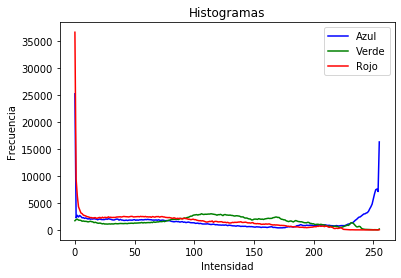

In [120]:
plot_rgb_histogramTodo(img02)

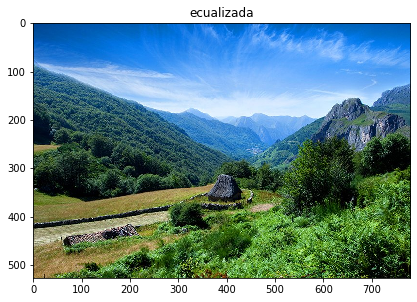

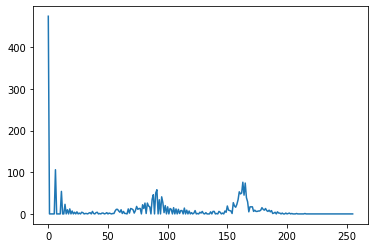

In [121]:
b, g, r = cv2.split(img02)
# Ecualizar el canal de valor (V)
equ_b = cv2.equalizeHist(b)
equ_g = cv2.equalizeHist(g)
equ_r = cv2.equalizeHist(r)

# Fusionar los canales nuevamente en la imagen HSV
equ_image = cv2.merge([equ_b,equ_g,equ_r])
imshow("ecualizada",img02)

hist = cv2.calcHist(equ_image, [0], None, [256], [0, 256])
plt.plot(hist)

In [122]:
def plot_rgb_histograms(image):
    # Dividir la imagen en canales RGB
    b, g, r = cv2.split(image)

    # Calcular los histogramas de cada canal
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    # Graficar los histogramas
    plt.figure(figsize=(10, 5))

    plt.subplot(3, 1, 1)
    plt.plot(hist_b, color='blue')
    plt.title('Histograma Canal Azul')

    plt.subplot(3, 1, 2)
    plt.plot(hist_g, color='green')
    plt.title('Histograma Canal Verde')

    plt.subplot(3, 1, 3)
    plt.plot(hist_r, color='red')
    plt.title('Histograma Canal Rojo')

    plt.tight_layout()
    plt.show()

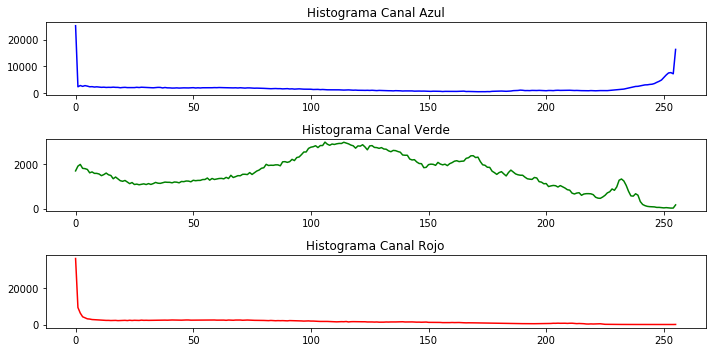

In [123]:
plot_rgb_histograms(img02)

In [124]:
def plot_rgb_histogramTodo(image):
    # Dividir la imagen en canales RGB
    b, g, r = cv2.split(image)

    # Calcular histograma de cada canal
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    plt.plot(hist_b, color='blue', label='Azul')
    plt.plot(hist_g, color='green', label='Verde')
    plt.plot(hist_r, color='red', label='Rojo')
    plt.title('Histogramas')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

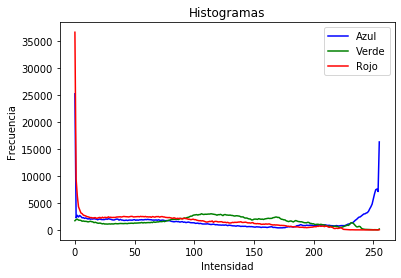

In [125]:
plot_rgb_histogramTodo(img02)